In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

from sklearn import tree #决策树
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.model_selection  import train_test_split#测试集和训练集
from sklearn.pipeline import Pipeline #管道

from sklearn.feature_selection import SelectKBest #特征选择
from sklearn.feature_selection import chi2 #卡方统计量

from sklearn.preprocessing import MinMaxScaler  #数据归一化
from sklearn.decomposition import PCA #主成分分析
from sklearn.model_selection import GridSearchCV #网格搜索交叉验证，用于选择最优的参数

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [5]:
#读取数据
path = './datas/iris.data'  
data = pd.read_csv(path, header=None)
x=data[list(range(4))]#获取X变量
y=pd.Categorical(data[4]).codes#把Y转换成分类型的0,1,2
print("总样本数目：%d;特征属性数目:%d" % x.shape)

总样本数目：150;特征属性数目:4


In [22]:
# 将类别转换为数字
cate = pd.Categorical(['a', 'c', 'b', 'a', 'd'])
# 获取原始数据中对应的数字下标，从0开始。
cate.codes
cate.categories

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [7]:
x.head(1)

,0,1,2,3
0,5.1,3.5,1.4,0.2


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [9]:
data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#数据进行分割（训练数据和测试数据）
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)

In [11]:
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))
## 因为需要体现以下是分类模型，因为DecisionTreeClassifier是分类算法，要求y必须是int类型
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

训练数据集样本数目：120, 测试数据集样本数目：30


In [12]:
y_train

array([0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1,
       2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 2, 1, 0, 1, 2])

In [13]:
#数据标准化
#StandardScaler (基于特征矩阵的列，将属性值转换至服从正态分布)
#标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下
#常用与基于正态分布的算法，比如回归

#数据归一化
#MinMaxScaler （区间缩放，基于最大最小值，将数据转换到0,1区间上的）
#提升模型收敛速度，提升模型精度
#常见用于神经网络

#Normalizer （基于矩阵的行，将样本向量转换为单位向量）
#其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准
#常见用于文本分类和聚类、logistic回归中也会使用，有效防止过拟合

ss = MinMaxScaler()
#用标准化方法对数据进行处理并转换
## scikit learn中模型API说明：
### fit: 模型训练；基于给定的训练集(X,Y)训练出一个模型；该API是没有返回值；eg: ss.fit(X_train, Y_train)执行后ss这个模型对象就训练好了
### transform：数据转换；使用训练好的模型对给定的数据集(X)进行转换操作；一般如果训练集进行转换操作，那么测试集也需要转换操作；这个API只在特征工程过程中出现
### predict: 数据转换/数据预测；功能和transform一样，都是对给定的数据集X进行转换操作，只是transform中返回的是一个新的X, 而predict返回的是预测值Y；这个API只在算法模型中出现
### fit_transform: fit+transform两个API的合并，表示先根据给定的数据训练模型(fit)，然后使用训练好的模型对给定的数据进行转换操作
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

('\xe5\x8e\x9f\xe5\xa7\x8b\xe6\x95\xb0\xe6\x8d\xae\xe5\x90\x84\xe4\xb8\xaa\xe7\x89\xb9\xe5\xbe\x81\xe5\xb1\x9e\xe6\x80\xa7\xe7\x9a\x84\xe8\xb0\x83\xe6\x95\xb4\xe6\x9c\x80\xe5\xb0\x8f\xe5\x80\xbc:', array([-1.19444444, -0.83333333, -0.18965517, -0.04166667]))
('\xe5\x8e\x9f\xe5\xa7\x8b\xe6\x95\xb0\xe6\x8d\xae\xe5\x90\x84\xe4\xb8\xaa\xe7\x89\xb9\xe5\xbe\x81\xe5\xb1\x9e\xe6\x80\xa7\xe7\x9a\x84\xe7\xbc\xa9\xe6\x94\xbe\xe6\x95\xb0\xe6\x8d\xae\xe5\x80\xbc:', array([0.27777778, 0.41666667, 0.17241379, 0.41666667]))


In [14]:
#特征选择：从已有的特征中选择出影响目标值最大的特征属性
#常用方法：{ 分类：F统计量、卡方系数，互信息mutual_info_classif
        #{ 连续：皮尔逊相关系数 F统计量 互信息mutual_info_classif
#SelectKBest（卡方系数）

#在当前的案例中，使用SelectKBest这个方法从4个原始的特征属性，选择出来3个
ch2 = SelectKBest(chi2,k=3)
#K默认为10
#如果指定了，那么就会返回你所想要的特征的个数
x_train = ch2.fit_transform(x_train, y_train)#训练并转换
x_test = ch2.transform(x_test)#转换

select_name_index = ch2.get_support(indices=True)
print ("对类别判断影响最大的三个特征属性分布是:",ch2.get_support(indices=False))
print(select_name_index)

('\xe5\xaf\xb9\xe7\xb1\xbb\xe5\x88\xab\xe5\x88\xa4\xe6\x96\xad\xe5\xbd\xb1\xe5\x93\x8d\xe6\x9c\x80\xe5\xa4\xa7\xe7\x9a\x84\xe4\xb8\x89\xe4\xb8\xaa\xe7\x89\xb9\xe5\xbe\x81\xe5\xb1\x9e\xe6\x80\xa7\xe5\x88\x86\xe5\xb8\x83\xe6\x98\xaf:', array([ True, False,  True,  True]))
[0 2 3]


In [15]:
#降维：对于数据而言，如果特征属性比较多，在构建过程中，会比较复杂，这个时候考虑将多维（高维）映射到低维的数据
#常用的方法：
#PCA：主成分分析（无监督）
#LDA：线性判别分析（有监督）类内方差最小，人脸识别，通常先做一次pca

# 将数据降低到n_components给定的维度
pca = PCA(n_components=2)#构建一个pca对象，设置最终维度是2维
# #这里是为了后面画图方便，所以将数据维度设置了2维，一般用默认不设置参数就可以

x_train = pca.fit_transform(x_train)#训练并转换
x_test = pca.transform(x_test)#转换

In [16]:
#模型的构建
model = DecisionTreeClassifier(criterion='entropy', max_depth=20,random_state=0)#另外也可选gini 
#模型训练
model.fit(x_train, y_train)
#模型预测
y_test_hat = model.predict(x_test) 

In [17]:
#模型结果的评估
y_test2 = y_test.reshape(-1)
result = (y_test2 == y_test_hat)
print ("准确率:%.2f%%" % (np.mean(result) * 100))
#实际可通过参数获取
print ("Score：", model.score(x_test, y_test))#准确率
print ("Classes:", model.classes_)
print("获取各个特征的重要性权重，值越大表示该特征对于目标属性y的影响越大:", end='')
print(model.feature_importances_)

SyntaxError: invalid syntax (<ipython-input-17-36e8d12554ae>, line 8)

In [18]:
#画图
N = 100  #横纵各采样多少个值
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] #测试点

y_show_hat = model.predict(x_show) #预测值

y_show_hat = y_show_hat.reshape(x1.shape)  #使之与输入的形状相同
print(y_show_hat.shape)
print(y_show_hat[0])

(100, 100)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


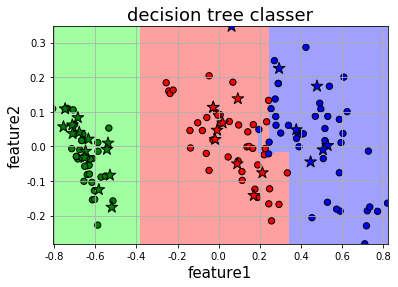

In [20]:
#画图
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
## 画一个区域图
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light) 
# 画测试数据的点信息
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
# 画训练数据的点信息
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'feature1', fontsize=15)
plt.ylabel(u'feature2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'decision tree classer', fontsize=18)
plt.show()

1深度，训练集上正确率0.66667
1深度，测试集上正确率0.57778

2深度，训练集上正确率0.71429
2深度，测试集上正确率0.71111

3深度，训练集上正确率0.80000
3深度，测试集上正确率0.75556

4深度，训练集上正确率0.81905
4深度，测试集上正确率0.75556

5深度，训练集上正确率0.81905
5深度，测试集上正确率0.71111

6深度，训练集上正确率0.85714
6深度，测试集上正确率0.66667

7深度，训练集上正确率0.85714
7深度，测试集上正确率0.66667

8深度，训练集上正确率0.85714
8深度，测试集上正确率0.66667

9深度，训练集上正确率0.86667
9深度，测试集上正确率0.71111

10深度，训练集上正确率0.86667
10深度，测试集上正确率0.71111

11深度，训练集上正确率0.86667
11深度，测试集上正确率0.71111

12深度，训练集上正确率0.86667
12深度，测试集上正确率0.71111

13深度，训练集上正确率0.86667
13深度，测试集上正确率0.71111

14深度，训练集上正确率0.87619
14深度，测试集上正确率0.66667



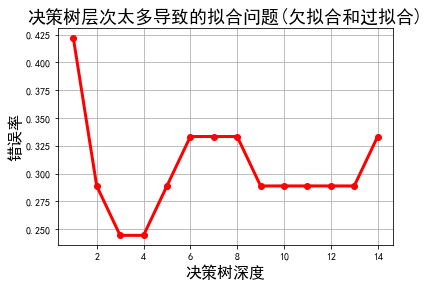

In [21]:
#基于原始数据前3列比较一下决策树在不同深度的情况下错误率
### TODO: 将模型在训练集上的错误率也画在图中
x_train4, x_test4, y_train4, y_test4 = train_test_split(x.iloc[:, :2], y, train_size=0.7, random_state=14)

depths = np.arange(1, 15)
err_list = []
for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, min_samples_split=10)#仅设置了这二个参数，没有对数据进行特征选择和降维，所以跟前面得到的结果不同
    clf.fit(x_train4, y_train4)
    
    ## 计算的是在训练集上的模型预测能力
    score = clf.score(x_test4, y_test4)
    err = 1 - score
    err_list.append(err)
    print("%d深度，训练集上正确率%.5f" % (d, clf.score(x_train4, y_train4)))
    print("%d深度，测试集上正确率%.5f\n" % (d, score))

## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.grid(True)
plt.title(u'决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()